In [847]:
import pandas as pd
import numpy as np
import missingno as msg
import seaborn as sns
import matplotlib.pyplot as plt

In [848]:
def print_info(df: pd.DataFrame) -> None:
    display(df.info())
    display(df.describe())
    display(df.isna().sum().apply(lambda x: round(x/df.shape[0] * 100, 2)))
    display(df.head(5))

In [849]:
data = pd.read_csv("data/train.csv")
print_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   author              2337 non-null   object 
 1   author_type         2334 non-null   object 
 2   location            2339 non-null   object 
 3   deal_type           2339 non-null   object 
 4   accommodation_type  2340 non-null   object 
 5   floor               2338 non-null   float64
 6   floors_count        2334 non-null   float64
 7   rooms_count         2344 non-null   float64
 8   total_meters        2335 non-null   float64
 9   price_per_month     2464 non-null   int64  
 10  commissions         2340 non-null   float64
 11  district            1832 non-null   object 
 12  street              2329 non-null   object 
 13  house_number        2332 non-null   object 
 14  underground         1702 non-null   object 
 15  ID                  2464 non-null   int64  
dtypes: flo

None

,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,ID
count,2338.000000,2334.000000,2344.000000,2335.000000,2.464000e+03,2340.0,2464.000000
mean,7.931138,14.979863,1.725683,63.705944,1.108466e+05,0.0,1232.500000
std,7.313855,11.080658,1.036799,54.804453,2.210778e+05,0.0,711.439855
min,1.000000,1.000000,-1.000000,5.800000,7.000000e+03,0.0,1.000000
25%,3.000000,8.000000,1.000000,37.000000,3.000000e+04,0.0,616.750000
50%,6.000000,12.000000,2.000000,47.000000,4.500000e+04,0.0,1232.500000
75%,10.000000,19.000000,2.000000,67.000000,7.500000e+04,0.0,1848.250000
max,76.000000,95.000000,5.000000,700.000000,4.200000e+06,0.0,2464.000000


author                 5.15
author_type            5.28
location               5.07
deal_type              5.07
accommodation_type     5.03
floor                  5.11
floors_count           5.28
rooms_count            4.87
total_meters           5.24
price_per_month        0.00
commissions            5.03
district              25.65
street                 5.48
house_number           5.36
underground           30.93
ID                     0.00
dtype: float64

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,district,street,house_number,underground,ID
0,67квартир,real_estate_agent,Смоленск,rent,flat,15.0,19.0,1.0,42.0,50000,0.0,Ленинский,Ново-Чернушенский переулок,5,NaN,1
1,Олег Тарасов,NaN,Подольск,rent,flat,1.0,3.0,1.0,37.0,38000,0.0,мкр. Силикатная,проезд Авиаторов,NaN,NaN,2
2,АЛЬФА,real_estate_agent,Иваново,rent,flat,15.0,32.0,2.0,63.0,280000,0.0,Дорогомилово,Поклонная,9,Поклонная,3
3,Сергей Спиридонов,realtor,Казань,rent,flat,5.0,5.0,2.0,56.0,35000,0.0,Московский,Волгоградская,13,Яшьлек,4
4,Людмила Ровенская,realtor,Иваново,rent,flat,NaN,8.0,2.0,44.0,49000,0.0,NaN,Крымская,69/1,NaN,5


Данные предоставлены в формате CSV и содержат информацию о квартирах, сдаваемых в аренду. В каждом файле данные организованы по строкам, где каждая строка – это отдельная квартира.

## Столбцы данных
- ```ID``` – Уникальный идентификатор записи
- ```author``` – Имя агентства или частного лица, сдающего квартиру
- ```author_type``` – Тип сдающего (например, агентство недвижимости)
- ```location``` – Область, где расположена квартира (например, Москва)
- ```deal_type``` – Тип сделки (в данном случае всегда "rent")
- ```accommodation_type``` – Тип жилья (например, "flat" для квартиры)
- ```floor``` – Этаж, на котором расположена квартира
- ```floors_count``` – Общее количество этажей в доме
- ```rooms_count``` – Количество комнат
- ```total_meters``` – Общая площадь квартиры в квадратных метрах
- ```price_per_month``` – Арендная плата за месяц (целевая переменная)
- ```commissions``` – Комиссия, включенная в аренду
- ```district``` – Район, в котором расположена квартира
- ```street``` – Улица, на которой находится квартира
- ```house_number``` – Номер дома
- ```underground``` – Ближайшая станция метро

In [850]:
# Заполню пропуски в городах по известным станциям метро
metro_dict = {
    "Москва": ["Авиамоторная","Автозаводская","Академическая","Александровский сад","Алексеевская","Алма-Атинская","Алтуфьево","Аннино","Арбатская","Аэропорт","Бабушкинская","Багратионовская","Баррикадная","Бауманская","Беговая","Беломорская","Белорусская","Беляево","Бибирево","Библиотека имени Ленина","Битцевский парк","Борисово","Боровицкая","Боровское шоссе","Ботанический сад","Братиславская","Бульвар адмирала Ушакова","Бульвар Дмитрия Донского","Бульвар Рокоссовского","Бунинская аллея","Бутырская","Варшавская","ВДНХ","Верхние Лихоборы","Владыкино","Водный стадион","Войковская","Волгоградский проспект","Волжская","Волоколамская","Воробьевы горы","Выставочная","Выхино","Говорово","Деловой центр","Динамо","Дмитровская","Добрынинская","Домодедовская","Достоевская","Дубровка","Жулебино","Зябликово","Измайловская","Калужская","Кантемировская","Каховская","Каширская","Киевская","Китай-город","Кожуховская","Коломенская","Коммунарка","Комсомольская","Коньково","Косино","Котельники","Красногвардейская","Краснопресненская","Красносельская","Красные ворота","Крестьянская застава","Кропоткинская","Крылатское","Кузнецкий мост","Кузьминки","Кунцевская","Курская","Кутузовская","Ленинский проспект","Лермонтовский проспект","Лесопарковая","Лефортово","Ломоносовский проспект","Лубянка","Лухмановская","Люблино","Марксистская","Марьина роща","Марьино","Маяковская","Медведково","Международная","Менделеевская","Минская","Митино","Мичуринский проспект","Молодежная","Мякинино","Нагатинская","Нагорная","Нахимовский проспект","Некрасовка","Нижегородская","Новогиреево","Новокосино","Новокузнецкая","Новопеределкино","Новослободская","Новоясеневская","Новые Черемушки","Озерная","Окружная","Окская","Октябрьская","Октябрьское поле","Ольховая","Орехово","Отрадное","Охотный ряд","Павелецкая","Парк культуры","Парк Победы","Партизанская","Первомайская","Перово","Петровский парк","Петровско-Разумовская","Печатники","Пионерская","Планерная","Площадь Ильича","Площадь Революции","Полежаевская","Полянка","Пражская","Преображенская площадь","Прокшино","Пролетарская","Проспект Вернадского","Проспект Мира","Профсоюзная","Пушкинская","Пятницкое шоссе","Раменки","Рассказовка","Речной вокзал","Рижская","Римская","Румянцево","Рязанский проспект","Савеловская","Саларьево","Свиблово","Севастопольская","Селигерская","Семеновская","Серпуховская","Славянский бульвар","Смоленская","Сокол","Сокольники","Солнцево","Спартак","Спортивная","Сретенский бульвар","Стахановская","Строгино","Студенческая","Сухаревская","Сходненская","Таганская","Тверская","Театральная","Текстильщики","Теплый Стан","Технопарк","Тимирязевская","Третьяковская","Тропарево","Трубная","Тульская","Тургеневская","Тушинская","Улица 1905 года","Улица академика Янгеля","Улица Горчакова","Улица Дмитриевского","Улица Скобелевская","Улица Старокачаловская","Университет","Филатов луг","Филевский парк","Фили","Фонвизинская","Фрунзенская","Ховрино","Хорошевская","Царицыно","Цветной бульвар","ЦСКА","Черкизовская","Чертановская","Чеховская","Чистые пруды","Чкаловская","Шаболовская","Шелепиха","Шипиловская","Шоссе Энтузиастов","Щелковская","Щукинская","Электрозаводская","Юго-Восточная","Юго-Западная","Южная","Ясенево"],
    "Казань": ["Авиастроительная","Аметьево","Горки","Козья слобода","Кремлёвская","Площадь Габдуллы Тукая","Проспект Победы","Северный вокзал","Суконная слобода","Яшьлек","Юность"]
}

for idx in data[data.location.isna() == True].index:
    if data.loc[idx, "underground"] in metro_dict["Москва"]:
        data.loc[idx, "location"] = "Москва"
    elif data.loc[idx, "underground"] in metro_dict["Казань"]:
        data.loc[idx, "location"] = "Казань"

In [851]:
data["location"].unique()

array(['Смоленск', 'Подольск', 'Иваново', 'Казань', 'Москва', 'Люберцы',
       'Калуга', nan, 'Рязань', 'Кашира', 'Брянск', 'Владимир', 'Киров',
       'Великий Новгород', 'Долгопрудный', 'Реутов'], dtype=object)

In [852]:
# Добавлю столбец, отражающий фактическое наличие метро для location
has_metro = ["Москва", "Казань", "Иваново", "Кашира", "Подольск", "Люберцы", "Реутов", "Долгопрудный"]
data["has_metro"] = data["location"].apply(lambda x: 1 if x in has_metro else 0)

In [853]:
# Посчитаю наиболее популярное метро для связки location + district 
mode_metro_by_district = data[data.has_metro == 1][["location", "district", "underground"]].groupby(["location", "district"]).agg(pd.Series.mode)
mode_metro_by_location = data[data.has_metro == 1][["location", "underground"]].groupby("location").agg(pd.Series.mode)
display(mode_metro_by_district)
display(mode_metro_by_location)

underground
location district                                  
Иваново  Адлерский                               []
         Адмиралтейский                 Фрунзенская
         Алексеевский                  Алексеевская
         Анапа                                   []
         Арбат                           Смоленская
...                                             ...
Подольск Велтон Парк Новая Сходня мкр            []
         Заповедное Озеро кп                     []
         д. Путилково                            []
         мкр. Силикатная                         []
Реутов   пос. Развилка                           []

[179 rows x 1 columns]

,underground
location,
Долгопрудный,Долгопрудная
Иваново,Маяковская
Казань,Горки
Кашира,Марьино
Люберцы,Люберцы
Москва,Москва-Сити
Подольск,Подольск
Реутов,Новокосино


In [854]:
mode_metro_by_district['underground'] = mode_metro_by_district['underground'].apply(lambda x: np.nan if not (type(x) is str) else x)

mode_metro_by_district_reset = mode_metro_by_district.reset_index()
mode_metro_by_district_reset['underground'] = mode_metro_by_district_reset['underground'].fillna(
    mode_metro_by_district_reset['location'].map(mode_metro_by_location['underground'])
)
mode_metro_by_district = mode_metro_by_district_reset.set_index(['location', 'district'])
mode_metro_by_district


underground
location district                                  
Иваново  Адлерский                       Маяковская
         Адмиралтейский                 Фрунзенская
         Алексеевский                  Алексеевская
         Анапа                           Маяковская
         Арбат                           Смоленская
...                                             ...
Подольск Велтон Парк Новая Сходня мкр      Подольск
         Заповедное Озеро кп               Подольск
         д. Путилково                      Подольск
         мкр. Силикатная                   Подольск
Реутов   пос. Развилка                   Новокосино

[179 rows x 1 columns]

In [855]:
# Заполню пропуски в городах с метро наиболее популярными станциями
data = data.merge(mode_metro_by_district.reset_index(), on=['location', 'district'], how='left', suffixes=('', '_mode'))
data['underground'] = data['underground'].fillna(data['underground_mode'])
data = data.drop(columns='underground_mode')
print_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   author              2337 non-null   object 
 1   author_type         2334 non-null   object 
 2   location            2400 non-null   object 
 3   deal_type           2339 non-null   object 
 4   accommodation_type  2340 non-null   object 
 5   floor               2338 non-null   float64
 6   floors_count        2334 non-null   float64
 7   rooms_count         2344 non-null   float64
 8   total_meters        2335 non-null   float64
 9   price_per_month     2464 non-null   int64  
 10  commissions         2340 non-null   float64
 11  district            1832 non-null   object 
 12  street              2329 non-null   object 
 13  house_number        2332 non-null   object 
 14  underground         1836 non-null   object 
 15  ID                  2464 non-null   int64  
 16  has_me

None

,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,ID,has_metro
count,2338.000000,2334.000000,2344.000000,2335.000000,2.464000e+03,2340.0,2464.000000,2464.000000
mean,7.931138,14.979863,1.725683,63.705944,1.108466e+05,0.0,1232.500000,0.749188
std,7.313855,11.080658,1.036799,54.804453,2.210778e+05,0.0,711.439855,0.433568
min,1.000000,1.000000,-1.000000,5.800000,7.000000e+03,0.0,1.000000,0.000000
25%,3.000000,8.000000,1.000000,37.000000,3.000000e+04,0.0,616.750000,0.000000
50%,6.000000,12.000000,2.000000,47.000000,4.500000e+04,0.0,1232.500000,1.000000
75%,10.000000,19.000000,2.000000,67.000000,7.500000e+04,0.0,1848.250000,1.000000
max,76.000000,95.000000,5.000000,700.000000,4.200000e+06,0.0,2464.000000,1.000000


author                 5.15
author_type            5.28
location               2.60
deal_type              5.07
accommodation_type     5.03
floor                  5.11
floors_count           5.28
rooms_count            4.87
total_meters           5.24
price_per_month        0.00
commissions            5.03
district              25.65
street                 5.48
house_number           5.36
underground           25.49
ID                     0.00
has_metro              0.00
dtype: float64

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,district,street,house_number,underground,ID,has_metro
0,67квартир,real_estate_agent,Смоленск,rent,flat,15.0,19.0,1.0,42.0,50000,0.0,Ленинский,Ново-Чернушенский переулок,5,NaN,1,0
1,Олег Тарасов,NaN,Подольск,rent,flat,1.0,3.0,1.0,37.0,38000,0.0,мкр. Силикатная,проезд Авиаторов,NaN,Подольск,2,1
2,АЛЬФА,real_estate_agent,Иваново,rent,flat,15.0,32.0,2.0,63.0,280000,0.0,Дорогомилово,Поклонная,9,Поклонная,3,1
3,Сергей Спиридонов,realtor,Казань,rent,flat,5.0,5.0,2.0,56.0,35000,0.0,Московский,Волгоградская,13,Яшьлек,4,1
4,Людмила Ровенская,realtor,Иваново,rent,flat,NaN,8.0,2.0,44.0,49000,0.0,NaN,Крымская,69/1,NaN,5,1


In [856]:
# Заполню пропуски в deal_type, там всё равно ничего кроме rent нет
data["deal_type"] = "rent"

In [857]:
# Заполню пропуски по этажам количеством этажей (возможно не лучший вариант) и наоборот
floors = data[["floor", "floors_count"]]
floor_na_idx = floors[data["floor"].isna()].index
floors_count_na_idx = floors[data["floors_count"].isna()].index
data.loc[floor_na_idx, "floor"] = data.loc[floor_na_idx, "floors_count"]
data.loc[floors_count_na_idx, "floors_count"] = data.loc[floors_count_na_idx, "floor"]

In [858]:
# Заполню пропуски в метраже и количестве комнат
meters = data[["total_meters", "rooms_count"]]
meters.loc[meters["rooms_count"] < 0, "rooms_count"] = np.nan
meters_per_room = meters.groupby("rooms_count").median()

data = data.merge(
    meters_per_room,
    on="rooms_count", 
    how="left", 
    suffixes=["", "_sub"]
)
# Метры заменю медианами по каждому количеству комнат
data['total_meters'] = data['total_meters'].fillna(data['total_meters_sub'])
data = data.drop(columns='total_meters_sub')

C:\Users\yurak\AppData\Local\Temp\ipykernel_13604\4152718197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meters.loc[meters["rooms_count"] < 0, "rooms_count"] = np.nan


In [859]:
def f(x: int) -> int:
    for i in range(2, 6):
        if x < meters_per_room.loc[i].item():
            return i - 1
    return 6
# Количество комнат заменю по медианам метража
for idx in data.index:
    data.loc[idx, "rooms_count"] = f(data.loc[idx, "total_meters"].item())

print_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   author              2337 non-null   object 
 1   author_type         2334 non-null   object 
 2   location            2400 non-null   object 
 3   deal_type           2464 non-null   object 
 4   accommodation_type  2340 non-null   object 
 5   floor               2455 non-null   float64
 6   floors_count        2455 non-null   float64
 7   rooms_count         2464 non-null   float64
 8   total_meters        2449 non-null   float64
 9   price_per_month     2464 non-null   int64  
 10  commissions         2340 non-null   float64
 11  district            1832 non-null   object 
 12  street              2329 non-null   object 
 13  house_number        2332 non-null   object 
 14  underground         1836 non-null   object 
 15  ID                  2464 non-null   int64  
 16  has_me

None

,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,ID,has_metro
count,2455.000000,2455.000000,2464.000000,2449.000000,2.464000e+03,2340.0,2464.000000,2464.000000
mean,8.286762,14.636660,1.685471,63.228820,1.108466e+05,0.0,1232.500000,0.749188
std,7.700806,11.038421,1.096490,53.818626,2.210778e+05,0.0,711.439855,0.433568
min,1.000000,1.000000,1.000000,5.800000,7.000000e+03,0.0,1.000000,0.000000
25%,3.000000,7.000000,1.000000,36.000000,3.000000e+04,0.0,616.750000,0.000000
50%,6.000000,12.000000,1.000000,47.500000,4.500000e+04,0.0,1232.500000,1.000000
75%,11.000000,19.000000,2.000000,66.000000,7.500000e+04,0.0,1848.250000,1.000000
max,78.000000,95.000000,6.000000,700.000000,4.200000e+06,0.0,2464.000000,1.000000


author                 5.15
author_type            5.28
location               2.60
deal_type              0.00
accommodation_type     5.03
floor                  0.37
floors_count           0.37
rooms_count            0.00
total_meters           0.61
price_per_month        0.00
commissions            5.03
district              25.65
street                 5.48
house_number           5.36
underground           25.49
ID                     0.00
has_metro              0.00
dtype: float64

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,district,street,house_number,underground,ID,has_metro
0,67квартир,real_estate_agent,Смоленск,rent,flat,15.0,19.0,1.0,42.0,50000,0.0,Ленинский,Ново-Чернушенский переулок,5,NaN,1,0
1,Олег Тарасов,NaN,Подольск,rent,flat,1.0,3.0,1.0,37.0,38000,0.0,мкр. Силикатная,проезд Авиаторов,NaN,Подольск,2,1
2,АЛЬФА,real_estate_agent,Иваново,rent,flat,15.0,32.0,2.0,63.0,280000,0.0,Дорогомилово,Поклонная,9,Поклонная,3,1
3,Сергей Спиридонов,realtor,Казань,rent,flat,5.0,5.0,2.0,56.0,35000,0.0,Московский,Волгоградская,13,Яшьлек,4,1
4,Людмила Ровенская,realtor,Иваново,rent,flat,8.0,8.0,1.0,44.0,49000,0.0,NaN,Крымская,69/1,NaN,5,1


In [860]:
data = data.drop(["author", "author_type", "deal_type", "accommodation_type", "commissions", "district", "street", "house_number", "underground", "ID"], axis=1)
print_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         2400 non-null   object 
 1   floor            2455 non-null   float64
 2   floors_count     2455 non-null   float64
 3   rooms_count      2464 non-null   float64
 4   total_meters     2449 non-null   float64
 5   price_per_month  2464 non-null   int64  
 6   has_metro        2464 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 134.9+ KB


None

,floor,floors_count,rooms_count,total_meters,price_per_month,has_metro
count,2455.000000,2455.000000,2464.000000,2449.000000,2.464000e+03,2464.000000
mean,8.286762,14.636660,1.685471,63.228820,1.108466e+05,0.749188
std,7.700806,11.038421,1.096490,53.818626,2.210778e+05,0.433568
min,1.000000,1.000000,1.000000,5.800000,7.000000e+03,0.000000
25%,3.000000,7.000000,1.000000,36.000000,3.000000e+04,0.000000
50%,6.000000,12.000000,1.000000,47.500000,4.500000e+04,1.000000
75%,11.000000,19.000000,2.000000,66.000000,7.500000e+04,1.000000
max,78.000000,95.000000,6.000000,700.000000,4.200000e+06,1.000000


location           2.60
floor              0.37
floors_count       0.37
rooms_count        0.00
total_meters       0.61
price_per_month    0.00
has_metro          0.00
dtype: float64

,location,floor,floors_count,rooms_count,total_meters,price_per_month,has_metro
0,Смоленск,15.0,19.0,1.0,42.0,50000,0
1,Подольск,1.0,3.0,1.0,37.0,38000,1
2,Иваново,15.0,32.0,2.0,63.0,280000,1
3,Казань,5.0,5.0,2.0,56.0,35000,1
4,Иваново,8.0,8.0,1.0,44.0,49000,1


In [861]:
# Пройдусь labelencor`ом, в cities_index и author_type_index сделал порядок по убыванию цены 
cities_index = {
    "Москва": 0,
    "Подольск": 1,
    "Люберцы": 2,
    "Долгопрудный": 3,
    "Реутов": 4,
    "Казань": 5,
    "Калуга": 6,
    "Кашира": 7,
    "Рязань": 8,
    "Владимир": 9,
    "Иваново": 10,
    "Великий Новгород": 11,
    "Смоленск": 12,
    "Брянск": 13,
    "Киров": 14
}

data["location"] = data["location"].map(cities_index)
print_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         2400 non-null   float64
 1   floor            2455 non-null   float64
 2   floors_count     2455 non-null   float64
 3   rooms_count      2464 non-null   float64
 4   total_meters     2449 non-null   float64
 5   price_per_month  2464 non-null   int64  
 6   has_metro        2464 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 134.9 KB


None

,location,floor,floors_count,rooms_count,total_meters,price_per_month,has_metro
count,2400.000000,2455.000000,2455.000000,2464.000000,2449.000000,2.464000e+03,2464.000000
mean,5.166667,8.286762,14.636660,1.685471,63.228820,1.108466e+05,0.749188
std,4.020650,7.700806,11.038421,1.096490,53.818626,2.210778e+05,0.433568
min,0.000000,1.000000,1.000000,1.000000,5.800000,7.000000e+03,0.000000
25%,2.000000,3.000000,7.000000,1.000000,36.000000,3.000000e+04,0.000000
50%,5.000000,6.000000,12.000000,1.000000,47.500000,4.500000e+04,1.000000
75%,8.000000,11.000000,19.000000,2.000000,66.000000,7.500000e+04,1.000000
max,14.000000,78.000000,95.000000,6.000000,700.000000,4.200000e+06,1.000000


location           2.60
floor              0.37
floors_count       0.37
rooms_count        0.00
total_meters       0.61
price_per_month    0.00
has_metro          0.00
dtype: float64

,location,floor,floors_count,rooms_count,total_meters,price_per_month,has_metro
0,12.0,15.0,19.0,1.0,42.0,50000,0
1,1.0,1.0,3.0,1.0,37.0,38000,1
2,10.0,15.0,32.0,2.0,63.0,280000,1
3,5.0,5.0,5.0,2.0,56.0,35000,1
4,10.0,8.0,8.0,1.0,44.0,49000,1


In [862]:
data.loc[:, "floor"] = np.log(data.loc[:, "floor"] + 1e-10)
data.loc[:, "floors_count"] = np.log(data.loc[:, "floors_count"] + 1e-10)
data.loc[:, "rooms_count"] = np.sqrt(data.loc[:, "rooms_count"])
data.loc[:, "total_meters"] = np.log(data.loc[:, "total_meters"] + 1e-10)
data.loc[:, "price_per_month"] = np.log(data.loc[:, "price_per_month"] + 1e-10)


C:\Users\yurak\AppData\Local\Temp\ipykernel_13604\1542581845.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[10.81977828 10.54534144 12.54254488 ... 10.1266311  10.59663473
 10.54534144]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, "price_per_month"] = np.log(data.loc[:, "price_per_month"] + 1e-10)


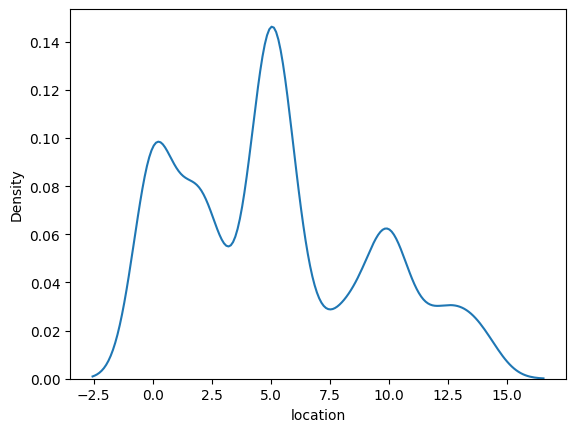

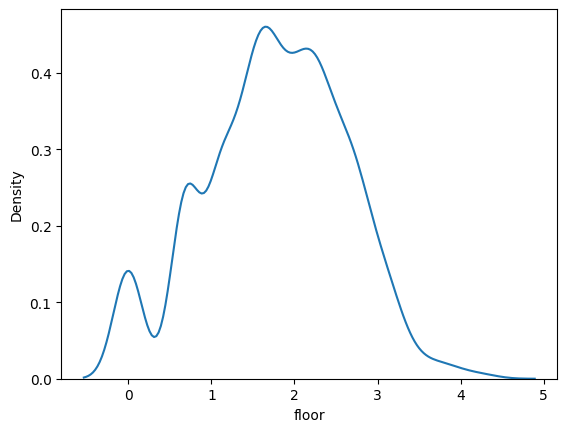

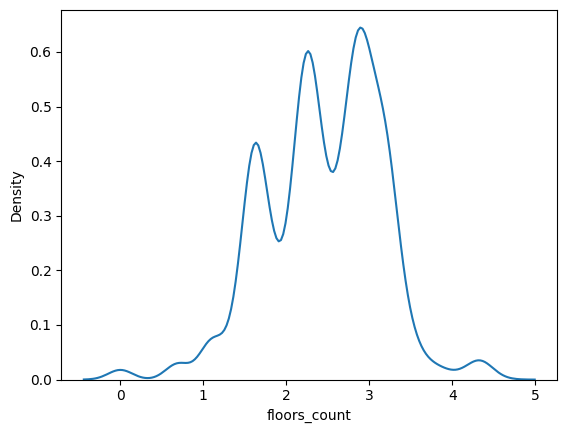

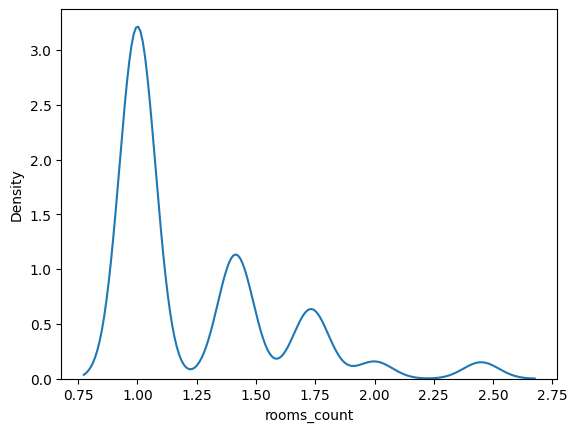

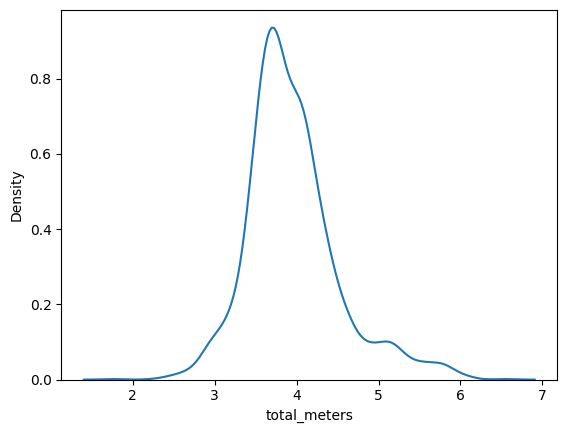

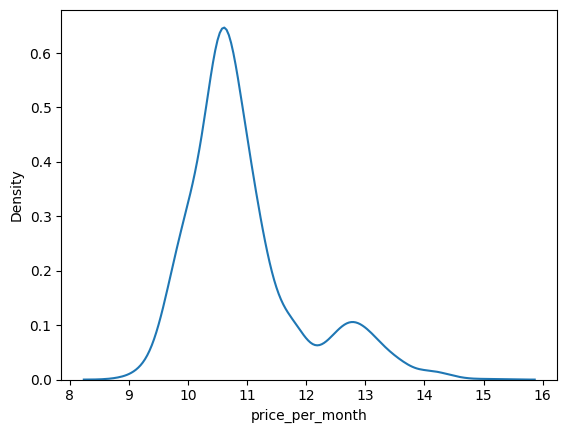

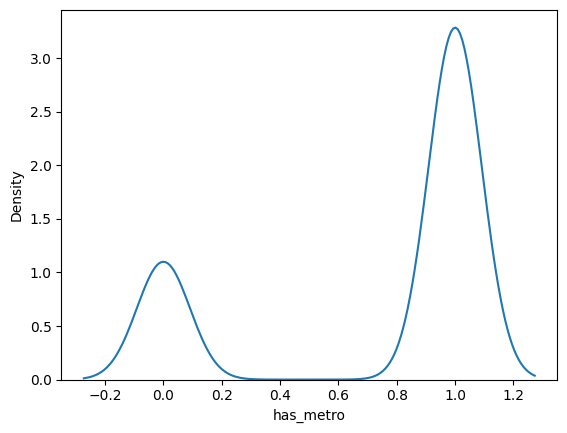

In [863]:
for col in data.columns:
    sns.kdeplot(data.loc[:, col])
    plt.show()

In [ ]:
# StandartScaler
for col in data.columns:
    data.loc[:, col] = (data.loc[:, col] - data.loc[:, col].mean()) / (data.loc[:, col].std() + 1e-10)
print_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         2400 non-null   float64
 1   floor            2455 non-null   float64
 2   floors_count     2455 non-null   float64
 3   rooms_count      2464 non-null   float64
 4   total_meters     2449 non-null   float64
 5   price_per_month  2464 non-null   float64
 6   has_metro        2464 non-null   float64
dtypes: float64(7)
memory usage: 134.9 KB


C:\Users\yurak\AppData\Local\Temp\ipykernel_13604\1606523642.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.72795912  0.57848252  0.57848252 ...  0.57848252  0.57848252
  0.57848252]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, col] = (data.loc[:, col] - data.loc[:, col].mean()) / (data.loc[:, col].std() + 1e-10)


None

,location,floor,floors_count,rooms_count,total_meters,price_per_month,has_metro
count,2.400000e+03,2.455000e+03,2.455000e+03,2.464000e+03,2.449000e+03,2.464000e+03,2.464000e+03
mean,-8.585725e-17,-4.775542e-17,2.836382e-16,-1.809519e-16,5.976799e-16,3.907408e-16,2.811604e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.285033e+00,-2.084262e+00,-3.505751e+00,-6.884465e-01,-3.890195e+00,-2.137485e+00,-1.727959e+00
25%,-7.876007e-01,-7.917767e-01,-7.231683e-01,-6.884465e-01,-6.543564e-01,-6.446292e-01,-1.727959e+00
50%,-4.145267e-02,2.369078e-02,4.757752e-02,-6.884465e-01,-1.630223e-01,-2.286968e-01,5.784825e-01
75%,7.046954e-01,7.367919e-01,7.046924e-01,4.637004e-01,4.199712e-01,2.953160e-01,5.784825e-01
max,2.196991e+00,3.041279e+00,3.006132e+00,3.343351e+00,4.605410e+00,4.424584e+00,5.784825e-01


location           2.60
floor              0.37
floors_count       0.37
rooms_count        0.00
total_meters       0.61
price_per_month    0.00
has_metro          0.00
dtype: float64

,location,floor,floors_count,rooms_count,total_meters,price_per_month,has_metro
0,1.699559,1.101680,0.704692,-0.688447,-0.381137,-0.120616,-1.727959
1,-1.036317,-2.084262,-1.934774,-0.688447,-0.605794,-0.402138,0.578483
2,1.202127,1.101680,1.450129,0.463700,0.337518,1.646624,0.578483
3,-0.041453,-0.190805,-1.204312,0.463700,0.128757,-0.486499,0.578483
4,1.202127,0.362140,-0.532223,-0.688447,-0.298684,-0.141341,0.578483


<Axes: >

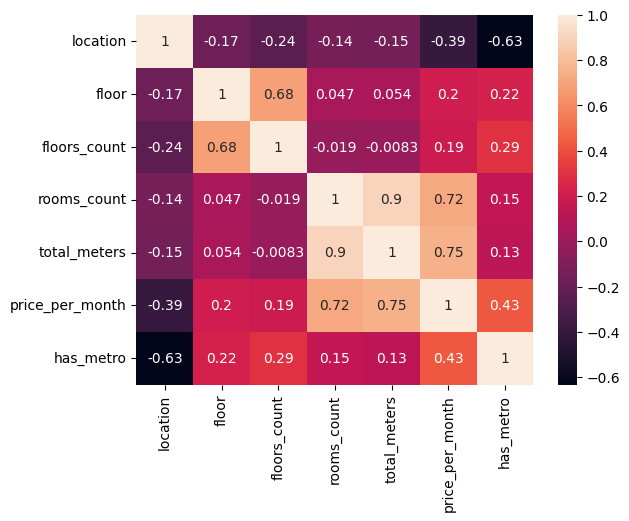

In [865]:
sns.heatmap(data.corr(), annot=True)

In [866]:
data.to_csv("data_prepoc_v1.csv")